In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# Load Dataset
df = pd.read_csv("data/features_30_sec.csv")
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Shape: (1000, 60)

Genres: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


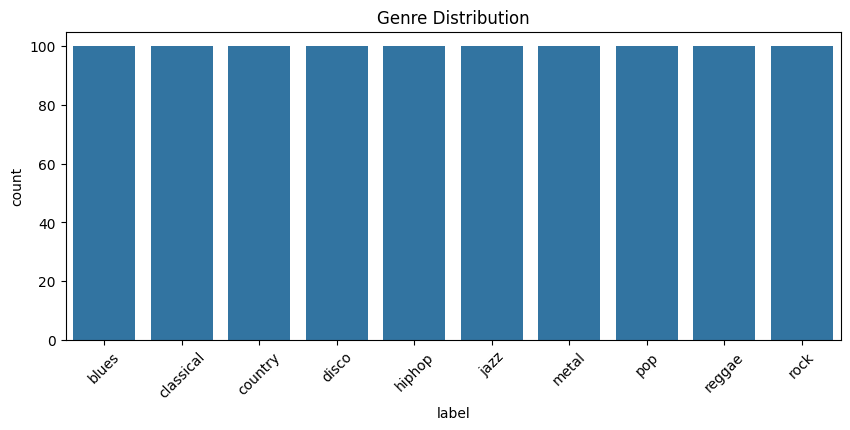

In [18]:
#Load Dataset
print("Shape:", df.shape)
print("\nGenres:", df["label"].unique())

plt.figure(figsize=(10,4))
sns.countplot(x=df["label"])
plt.xticks(rotation=45)
plt.title("Genre Distribution")
plt.show()


In [19]:
# Drop non-feature columns
drop_cols = []

if "filename" in df.columns:
    drop_cols.append("filename")
if "length" in df.columns:
    drop_cols.append("length")

X = df.drop(columns=drop_cols + ["label"])

# Keep only numeric columns (main FIX)
X = X.select_dtypes(include=['float64', 'int64'])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df["label"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (800, 57)
Test : (200, 57)


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaling complete!")


Scaling complete!


In [22]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

       blues       0.68      0.75      0.71        20
   classical       1.00      1.00      1.00        13
     country       0.71      0.63      0.67        27
       disco       0.57      0.57      0.57        21
      hiphop       0.48      0.67      0.56        15
        jazz       0.83      0.91      0.87        22
       metal       0.70      0.92      0.79        25
         pop       0.78      0.54      0.64        13
      reggae       0.53      0.43      0.48        23
        rock       0.50      0.33      0.40        21

    accuracy                           0.67       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.67      0.67      0.66       200



In [15]:
#Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

le.classes_


array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [14]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train.shape, X_test.shape


((800, 58), (200, 58))

In [13]:
#Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaling complete!")


ValueError: could not convert string to float: 'jazz.00075.wav'

In [ ]:
#Train Model (Random Forest)

In [12]:
df.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy (%):", accuracy * 100)


Accuracy: 0.67
Accuracy (%): 67.0


In [25]:
#Show Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.67


In [26]:
#Show Correctly & Incorrectly Classified Genres
# Convert encoded labels back to actual genre names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Create a DataFrame to compare
results_df = pd.DataFrame({
    "Actual Genre": y_test_labels,
    "Predicted Genre": y_pred_labels
})

# Show first 10 results
print(results_df.head(10))


  Actual Genre Predicted Genre
0         jazz            jazz
1          pop             pop
2          pop             pop
3        metal           metal
4       hiphop          hiphop
5        metal           metal
6        metal           metal
7         jazz            jazz
8       reggae          reggae
9    classical       classical


In [27]:
#Show Only Correct Predictions
correct = results_df[results_df["Actual Genre"] == results_df["Predicted Genre"]]
print("Correct Predictions:", len(correct))
correct.head(10)


Correct Predictions: 134


,Actual Genre,Predicted Genre
0,jazz,jazz
1,pop,pop
2,pop,pop
3,metal,metal
4,hiphop,hiphop
5,metal,metal
6,metal,metal
7,jazz,jazz
8,reggae,reggae
9,classical,classical


In [28]:
#Show Only Wrong Predictions
wrong = results_df[results_df["Actual Genre"] != results_df["Predicted Genre"]]
print("Wrong Predictions:", len(wrong))
wrong.head(10)

Wrong Predictions: 66


,Actual Genre,Predicted Genre
13,rock,metal
14,rock,disco
15,reggae,metal
16,country,reggae
17,reggae,blues
19,disco,reggae
20,jazz,blues
27,rock,disco
28,rock,hiphop
29,rock,disco


In [29]:
#Count How Many Times Each Genre Was Predicted Correctly
genre_wise_accuracy = correct["Actual Genre"].value_counts()
print("Correct predictions per genre:")
print(genre_wise_accuracy)


Correct predictions per genre:
Actual Genre
metal        23
jazz         20
country      17
blues        15
classical    13
disco        12
reggae       10
hiphop       10
pop           7
rock          7
Name: count, dtype: int64


In [31]:
#Genre-wise Accuracy Percentage
genre_total = results_df["Actual Genre"].value_counts()
genre_correct = correct["Actual Genre"].value_counts()

genre_accuracy = (genre_correct / genre_total) * 100
print("Genre-wise Accuracy (%):")
print(genre_accuracy)


Genre-wise Accuracy (%):
Actual Genre
blues         75.000000
classical    100.000000
country       62.962963
disco         57.142857
hiphop        66.666667
jazz          90.909091
metal         92.000000
pop           53.846154
reggae        43.478261
rock          33.333333
Name: count, dtype: float64


In [32]:
#Overall Genre Accuracy Percentage (Simple Code)
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Overall Genre Classification Accuracy: {:.2f}%".format(accuracy * 100))


Overall Genre Classification Accuracy: 67.00%


In [2]:
# 1️⃣ Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 2️⃣ Load dataset
df = pd.read_csv("data/features_30_sec.csv")

# 3️⃣ Preprocessing (remove non-numerical columns)
X = df.drop(['filename', 'length', 'label'], axis=1)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['label'])

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 5️⃣ Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ TRAIN MODEL
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


In [3]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
overall_accuracy = accuracy_score(y_test, y_pred) * 100

print("Overall Genre Accuracy:", overall_accuracy, "%")


Overall Genre Accuracy: 67.0 %


Overall Genre Accuracy: 67.0 %

Genre-wise Accuracy (%):
blues: 68.2%
classical: 100.0%
country: 70.8%
disco: 57.1%
hiphop: 47.6%
jazz: 83.3%
metal: 69.7%
pop: 77.8%
reggae: 52.6%
rock: 50.0%


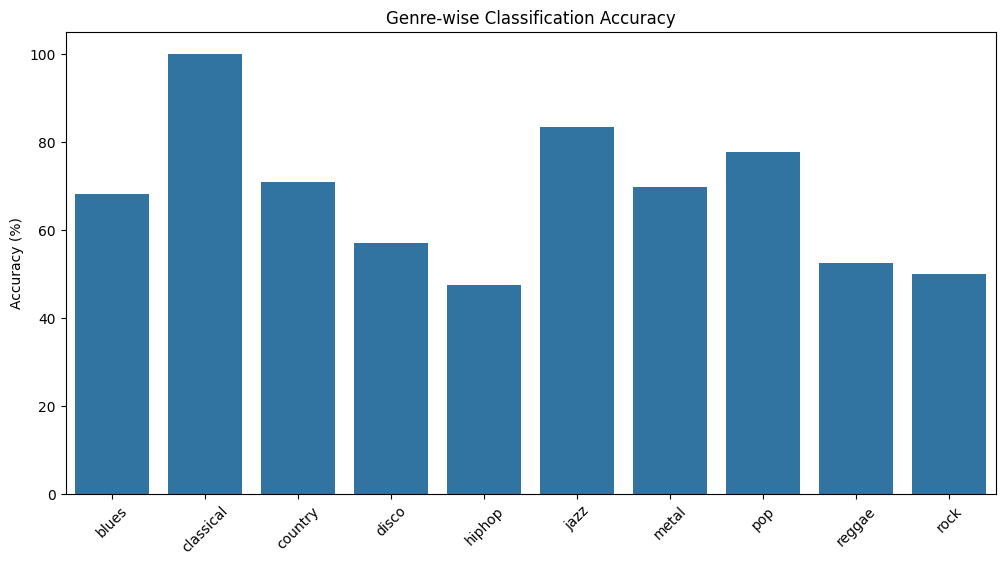

In [4]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ PREDICT
y_pred = model.predict(X_test)

# 2️⃣ OVERALL ACCURACY (simple)
overall_accuracy = accuracy_score(y_test, y_pred) * 100
print("Overall Genre Accuracy:", overall_accuracy, "%")

# 3️⃣ GENRE-WISE ACCURACY
report = classification_report(
    y_test, 
    y_pred, 
    target_names=le.classes_, 
    output_dict=True
)

genre_names = []
genre_accuracy = []

for genre in le.classes_:
    acc = report[genre]["precision"] * 100   # precision = how many predicted correctly
    genre_names.append(genre)
    genre_accuracy.append(acc)

# Print Genre-wise Accuracy
print("\nGenre-wise Accuracy (%):")
for g, a in zip(genre_names, genre_accuracy):
    print(f"{g}: {a:.1f}%")

# 4️⃣ BAR GRAPH FOR GENRE-WISE ACCURACY
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_names, y=genre_accuracy)
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Genre-wise Classification Accuracy")
plt.show()
